# 0.0 Importar bibliotecas 

In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import ipywidgets as widgets

from tabulate import tabulate
from collections import Counter
from ipywidgets import interactive, interact, fixed, interact_manual
from matplotlib import gridspec
from datetime import date, datetime

## 0.1 Funções Auxíliares

In [80]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams['figure.figsize'] = (11,7)

# 1.0 Importando dataset

In [49]:
data = pd.read_csv('kc_house_data.csv')

## 1.1 Dimensões dos dados

In [50]:
raw_size = data.shape
print('Número de linhas:', raw_size[0])
print('Número de colunas:', raw_size[1])

Número de linhas: 21613
Número de colunas: 21


## 1.2 Tipos de variáveis

In [51]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.3 Alterando tipo de variáveis

In [135]:
data['date'] = pd.to_datetime(data['date'])
data['built'] = data['yr_built'].apply(lambda x: '<1955' if x <= 1955 else '>1955')
data['basement'] = data['sqft_basement'].apply(lambda x: True if x > 0 else False)
data['floors_type'] = data['floors'].apply(lambda x: 'single-story' if x == 1 else 'two-story-or-more')
data['renovated'] = data['yr_renovated'].apply(lambda x: 'yes' if x > 0 else 'no')
data['condition_type'] = data['condition'].apply(lambda x: 'bad' if x <= 2 else 'good')
data['grade_design'] = data['grade'].apply(lambda x: 'bad' if x < 6 else 'good')
data['bathrooms'] = data['bathrooms'].astype('int64')
data['year_mounth'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')

## 1.4 Ordenando dados

In [83]:
data = data.sort_values('date',ascending=True)

## 1.5 Limpeza de dados

### 1.5.1 Duplicatas

In [84]:
data = data.drop_duplicates(subset=['id'],  keep = 'last')

In [85]:
print('Número de linhas:', data.shape[0])
print('Número de colunas:', data.shape[1])
print('Duplicatas removidas:', raw_size[0] - data.shape[0])

Número de linhas: 21435
Número de colunas: 22
Duplicatas removidas: 178


### 1.5.2 Checando Dados sem registro

In [86]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
built            0
dtype: int64

### 1.5.3 Estatística descritiva

In [87]:
data.describe(include=['int64','float64'])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00,21435.00
mean,4580866968.69,541645.37,3.37,2.12,2082.73,15136.06,1.50,0.01,0.24,3.41,7.66,1791.00,291.73,1971.10,84.73,98077.86,47.56,-122.21,1988.35,12786.34
std,2876618243.24,367322.88,0.91,0.77,919.16,41539.54,0.54,0.09,0.77,0.65,1.17,829.03,442.79,29.39,402.44,53.47,0.14,0.14,685.70,27376.05
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123700057.50,324844.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1200.00,0.00,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904921250.00,450000.00,3.00,2.25,1920.00,7614.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308750075.00,645000.00,4.00,2.50,2550.00,10696.50,2.00,0.00,0.00,4.00,8.00,2220.00,560.00,1997.00,0.00,98117.00,47.68,-122.12,2370.00,10087.50
max,9900000190.00,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [88]:
# Verificando caracteristicas do imóvel com 33 bedrooms 'quartos', para constatar se é um outlier ou erro

data[data['bedrooms'] > 8].sort_values('bedrooms',ascending=False)[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot']]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot
8757,1773100755,520000.00,11,3.00,3000,4960
13314,627300145,1148000.00,10,5.25,4590,10920
15161,5566100170,650000.00,10,2.00,3610,11914
19254,8812401450,660000.00,10,3.00,2920,3745
4096,1997200215,599999.00,9,4.50,3830,6988
6079,9822700190,1280000.00,9,4.50,3650,5000
8546,424049043,450000.00,9,7.50,4050,6504
4235,2902200015,700000.00,9,3.00,3680,4400
18443,8823901445,934000.00,9,3.00,2820,4480
16844,8823900290,1400000.00,9,4.00,4620,5508


In [89]:
# De acordo com os dados acima, caracterizei o registro como erro e removi do dataset
data = data.drop(15870, axis=0)

KeyError: '[15870] not found in axis'

# 2.0 Exploração de Dados

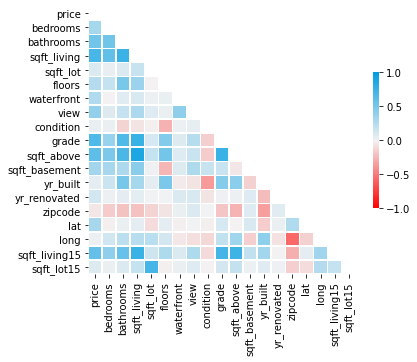

In [90]:
#Gerando matrix 
matrix = data.copy()
matrix = matrix.drop(['date','id'], axis = 1)
matrix = matrix.corr()

#Gerando máscara
mask = np.triu(np.ones_like(matrix, dtype=bool))

#Criando figura
f, ax = plt.subplots(figsize=(6, 5))

#Gerando novo mapa de cores
cmap = sns.diverging_palette(20, 220, 300, as_cmap=True)

#Plotando matrix
sns.heatmap(matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 2.1 Hipóteses e Insights

In [91]:
df = data.copy()

### H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

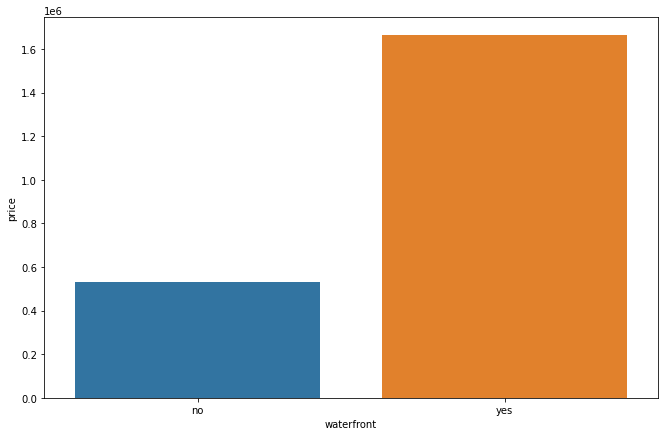

In [92]:
h1 = df[['waterfront', 'price']].groupby('waterfront').mean().reset_index()

h1['waterfront'] = h1['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

sns.barplot(data=h1, x='waterfront', y='price');

### H2: Imóveis com data de construção menor que 1955 são 50% mais baratos, na média.

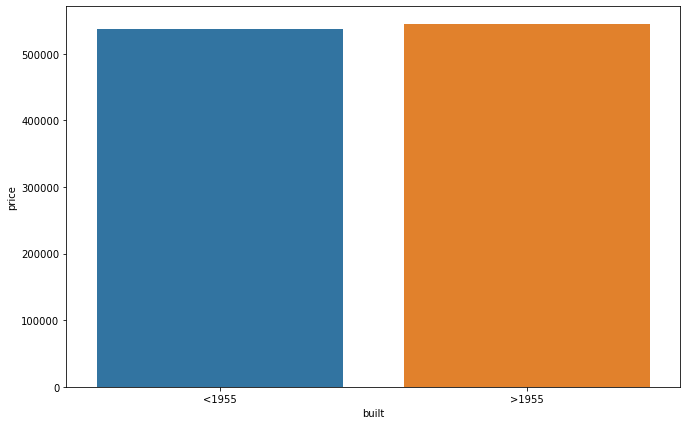

In [96]:
h2 = data[['built', 'price']].groupby('built').mean().reset_index()
sns.barplot(data=h2, x='built',y='price');

### H3: Imóveis sem porão (sqft_lot), são 40% maiores que os imóveis com porão

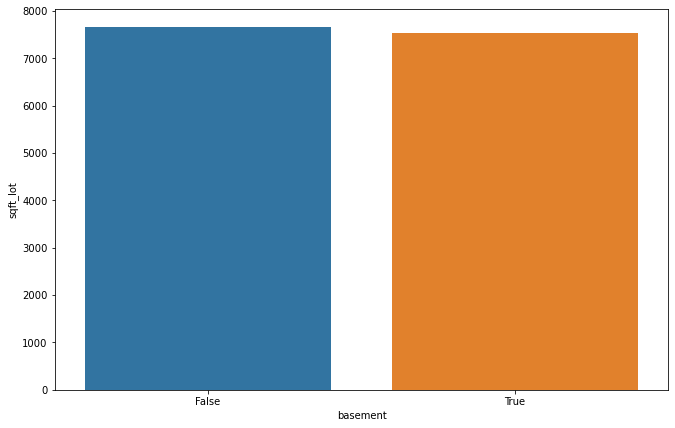

In [105]:
h3 = data[['basement', 'sqft_lot', 'price']].groupby('basement').median().reset_index()
sns.barplot(data=h3, x='basement', y='sqft_lot');

### H4: A mediana de preço de imóveis com 2 andares ou mais, com vista para água é 20% mais alta, que imóveis com 1 andar e com vista para água.

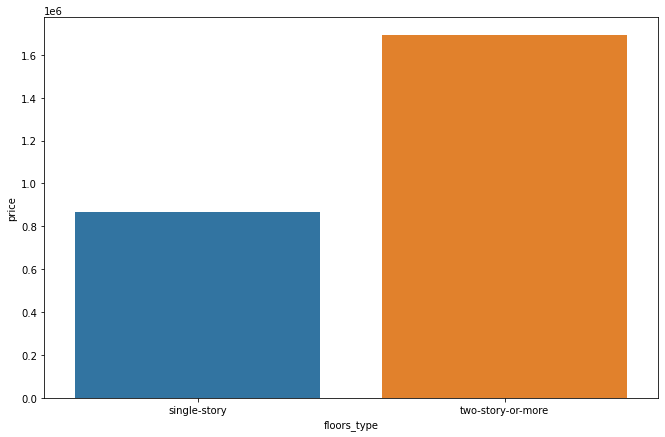

In [109]:
h4 = data[['floors_type', 'waterfront', 'price']].groupby(['floors_type', 'waterfront']).median().reset_index()
h4 = h4[h4['waterfront'] == 1]
sns.barplot(data=h4, x='floors_type', y='price');

### H5: Imóveis renovados são 20% mais caros

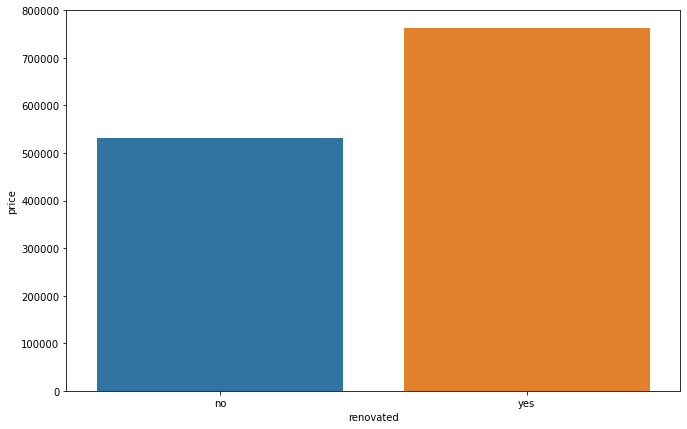

In [113]:
h5 = data[['renovated', 'price']].groupby('renovated').mean().reset_index()
sns.barplot(data=h5, x='renovated', y='price');

### H6: Imóveis em más condições são 30%, mais baratos que imóveis com boas condições

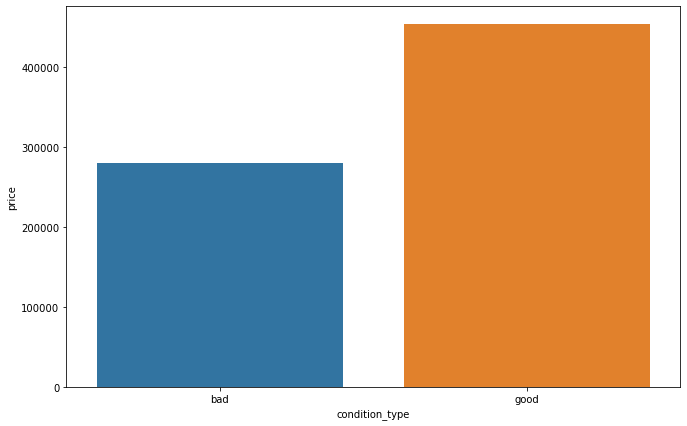

In [118]:
h6 = data[['condition_type', 'price']].groupby('condition_type').median().reset_index()
sns.barplot(data=h6, x='condition_type', y='price');

### H7: Imóveis com más condições e grade baixo são 50% mais baratos que imóveis com boas condições e grade alto.

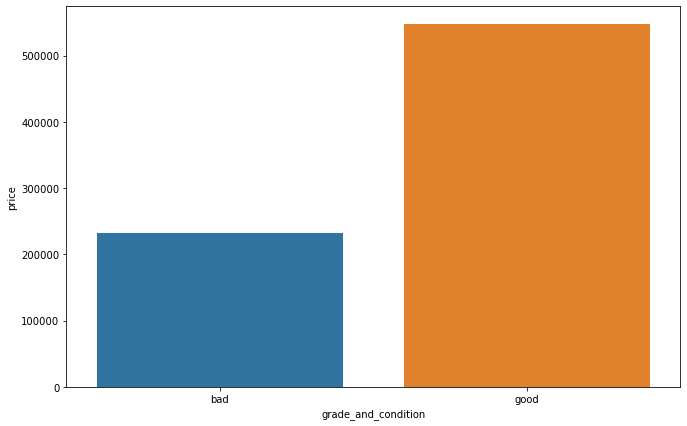

In [122]:
h7 = data[['grade_design', 'condition_type', 'price']].groupby(['condition_type', 'grade_design']).mean().reset_index()

h7 = h7[(h7['condition_type'] == 'bad') & (h7['grade_design'] == 'bad') | (h7['condition_type'] == 'good') & 
        (h7['grade_design'] == 'good')]

h7.columns = ['condition_type', 'grade_and_condition', 'price']

sns.barplot(data=h7, x='grade_and_condition', y='price');

### H8: Há um aumento do preço em 10% a cada banheiro adicional

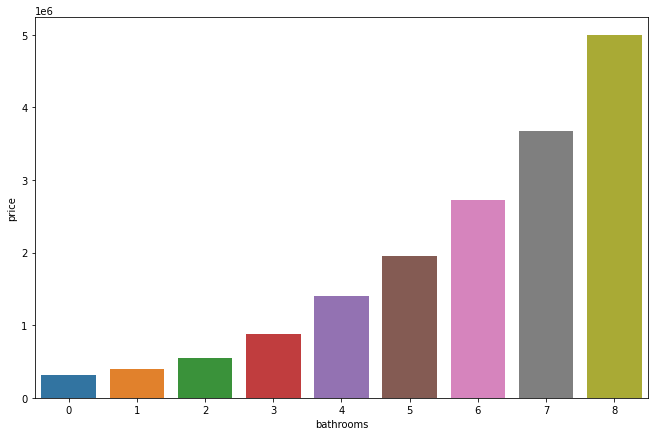

In [133]:
h8 = data[['bathrooms', 'price']].groupby('bathrooms').mean().reset_index()
p = h8[['price']].pct_change().fillna(0).reset_index()
p.columns = ['bathrooms', 'price']
sns.barplot(data=h8, x='bathrooms', y='price');

### H9: Imóveis com 3 banheiros tem um crescimento Mounth over Mounth de 15%

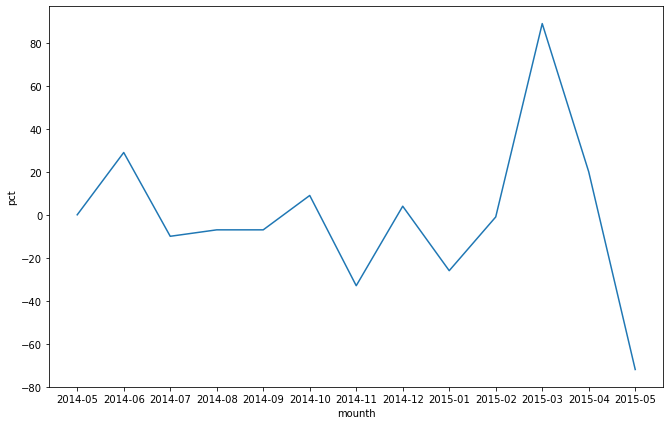

In [140]:
h9 = data[data['bathrooms'] == 3][['price', 'year_mounth']]
h9 = h9[['price', 'year_mounth']].groupby('year_mounth').sum()
h9 = h9.pct_change(periods=1).fillna(0).reset_index()
h9['price'] = round(h9['price'], 2) * 100
h9.columns = ['mounth', 'pct']
sns.lineplot(data=h9, x='mounth', y='pct');

### 10: Quanto maior o atributo grade do imóvel, a média de preço cresce 20%

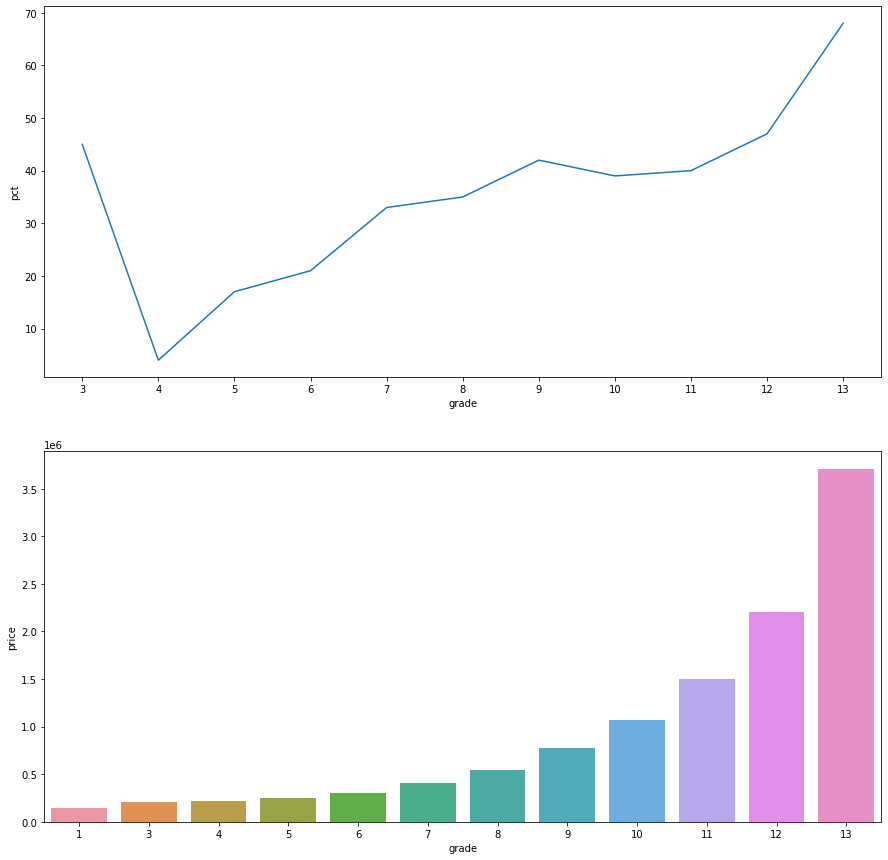

In [159]:
fig = plt.figure(figsize=(15,15))

specs = gridspec.GridSpec(ncols= 2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0,:])
ax2 = fig.add_subplot(specs[1,:])

h10 = data[['grade', 'price']].groupby('grade').mean().reset_index()
h10['price'] = h10['price'].pct_change()
h10['grade'] = h10['grade'].astype(str)
h10['price'] = round(h10['price'], 2) * 100
h10.columns = ['grade', 'pct']
sns.lineplot(data=h10, x='grade', y='pct', ax=ax1)

h11 = data[['grade', 'price']].groupby('grade').mean().reset_index()
h11['grade'] = h11['grade'].astype(str)
h10 = data[['grade', 'price']].groupby('grade').mean().reset_index()
sns.barplot(data=h11, x='grade', y='price', ax=ax2);

# Questões de negócio

## 3.1 Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [227]:
#Transformação dos dados
df = data.copy()

df = df[['zipcode','price']].groupby('zipcode').median().reset_index()
df.columns = ['zipcode','price_median']

df1 = pd.merge(data, df, on='zipcode', how='inner')

def get_season(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'
    
df1['season'] = df1.date.map(get_season)
    
df1['status'] = 'NA'
for i in range(len(df1)):
    if (df1.loc[i, 'price'] < df1.loc[i, 'price_median']) & (df1.loc[i, 'condition'] > 2):
        df1.loc[i, 'status'] = 'buy'
    else:
        df1.loc[i, 'status'] = 'dont buy'

df2 = df1.copy()

df2 = df2[['zipcode','season','price']].groupby(['zipcode','season']).median().reset_index()
df2.columns = ['zipcode','season','season_median']

df3 = pd.merge(df1, df2, on=['zipcode','season'], how='inner')

df4 = df3[['zipcode','season','price']].groupby(['zipcode','season']).median().reset_index()
df4 = df4.pivot(index='zipcode', columns='season', values='price').reset_index()

df5 = pd.merge(df3, df4, on='zipcode', how='inner')

for i in range(len(df5)):
    if df5.loc[i, 'price'] >= df5.loc[i, 'season_median']:
        df5.loc[i, 'sell_price'] = (df5.loc[i, 'price'] * 0.10) + df5.loc[i, 'price']
    else:
        df5.loc[i, 'sell_price'] = (df5.loc[i, 'price'] * 0.30) + df5.loc[i, 'price']

i = 0
df5['best_season'] = ''
while i < len(df5):
    cols = ['autumn','spring','summer','winter']
    if df5.loc[i, cols[0]] >= df5.loc[i, 'sell_price']:
        df5.loc[i, 'best_season'] = df5.loc[i, 'best_season'] + 'autumn'
    if df5.loc[i, cols[1]] >= df5.loc[i, 'sell_price']:
        df5.loc[i, 'best_season'] = df5.loc[i, 'best_season'] + ',' + 'spring'
    if df5.loc[i, cols[2]] >= df5.loc[i, 'sell_price']:
        df5.loc[i, 'best_season'] = df5.loc[i, 'best_season'] + ',' + 'summer'
    if df5.loc[i, cols[3]] >= df5.loc[i, 'sell_price']:
        df5.loc[i, 'best_season'] = df5.loc[i, 'best_season'] + ',' + 'winter'
    if df5.loc[i, 'best_season'] == '':
        df5.loc[i, 'best_season'] = 'no_season'
    i = i + 1

for i in range(len(df5)):
    df5.loc[i, 'best_season'] = df5.loc[i, 'best_season'].lstrip(',')

df5['profit'] = df5['sell_price'] - df5['price']

In [231]:
#Casa para comprar
report = df5[['id', 'zipcode', 'season', 'price', 'price_median', 'status', 'sell_price', 'profit', 'best_season']]
report = report[(report['best_season'] != 'no_season') & (report['status'] == 'buy')].sort_values('id', ascending=True)
report

,id,zipcode,season,price,price_median,status,sell_price,profit,best_season
20163,3800008,98178,winter,178000.00,279500.00,buy,231400.00,53400.00,"autumn,spring,summer,winter"
8475,7200179,98055,spring,175000.00,297225.00,buy,227500.00,52500.00,"autumn,spring,summer,winter"
16589,7400062,98118,spring,299800.00,370000.00,buy,389740.00,89940.00,spring
14340,7600065,98122,spring,465000.00,574000.00,buy,604500.00,139500.00,spring
14427,7600136,98122,summer,411000.00,574000.00,buy,534300.00,123300.00,"autumn,spring,summer"
...,...,...,...,...,...,...,...,...,...
17757,9834201215,98144,autumn,276000.00,452500.00,buy,358800.00,82800.00,"autumn,spring,summer,winter"
17810,9834201366,98144,autumn,429900.00,452500.00,buy,472890.00,42990.00,"summer,winter"
17811,9834201470,98144,autumn,303000.00,452500.00,buy,393900.00,90900.00,"autumn,spring,summer,winter"
165,9895000040,98027,summer,399900.00,571000.00,buy,519870.00,119970.00,"autumn,spring,summer,winter"


In [ ]:
#Exportar para CSV
#df5.to_csv(path, index=False)

## 3.2 Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço?

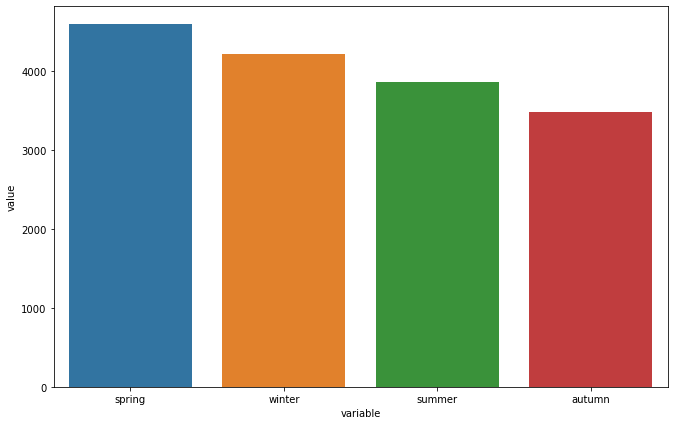

In [218]:
#Além da melhor season estar indicada na coluna best_season da tabela anterior, a seguir>
#Plot das seasons com maior recorrência
season = report.copy()
season = season['best_season'].tolist()
season = ','.join(season)
season = season.split(',')
season_count = Counter(season)
season_count = pd.DataFrame(([season_count]))
season_count = season_count.melt().sort_values('value', ascending=False)
sns.barplot(data=season_count, x='variable', y='value');

## 3.3 Resultado do negócio

Também foi realizado um filtro para sugerir a compra dos Top 20 imóveis, por **lucratividade**, por **baixo investimento** e um Bônus de **imóveis para reforma com maior ganho**.

In [229]:
#Por lucratividade
sample = report[(report['best_season'] != 'no_season') & (report['status'] == 'buy')].sort_values('profit', ascending=False)
sample = sample.iloc[0:21,:].copy()
sample.reset_index(drop=True)

,id,zipcode,season,price,price_median,status,sell_price,profit,best_season
0,3262300322,98039,spring,1651000.00,1905000.00,buy,2146300.00,495300.00,"autumn,summer"
1,3025300250,98039,spring,1620000.00,1905000.00,buy,2106000.00,486000.00,"autumn,summer"
2,3262300235,98039,autumn,1555000.00,1905000.00,buy,2021500.00,466500.00,"autumn,summer"
3,2525049246,98039,autumn,1550000.00,1905000.00,buy,2015000.00,465000.00,"autumn,summer"
4,3025300225,98039,autumn,1450000.00,1905000.00,buy,1885000.00,435000.00,"autumn,summer"
5,5427100150,98039,summer,1410000.00,1905000.00,buy,1833000.00,423000.00,"autumn,summer,winter"
6,2525049133,98039,spring,1398000.00,1905000.00,buy,1817400.00,419400.00,"autumn,summer,winter"
7,3625049079,98039,summer,1350000.00,1905000.00,buy,1755000.00,405000.00,"autumn,spring,summer,winter"
8,3262301355,98039,summer,1320000.00,1905000.00,buy,1716000.00,396000.00,"autumn,spring,summer,winter"
9,3835502815,98039,autumn,1260000.00,1905000.00,buy,1638000.00,378000.00,"autumn,spring,summer,winter"


In [255]:
#Lucratividade / Investimento e Lucro Esperado
dic = {"Investimento Inicial": sample['price'].sum(), 'Lucro Esperado': sample['profit'].sum()}
capital = pd.Series(dic).to_frame('Valor USD')
capital

,Valor USD
Investimento Inicial,26404300.00
Lucro Esperado,7921290.00


In [238]:
#Baixo investimento
sample2 = report[(report['best_season'] != 'no_season') & (report['status'] == 'buy')].sort_values('price', ascending=True)
sample2 = sample2.iloc[0:21,:].copy()
sample2.reset_index(drop=True)

,id,zipcode,season,price,price_median,status,sell_price,profit,best_season
0,3421079032,98022,winter,75000.00,279500.00,buy,97500.00,22500.00,"autumn,spring,summer,winter"
1,7999600180,98168,spring,83000.00,237000.00,buy,107900.00,24900.00,"autumn,spring,summer,winter"
2,1523049188,98168,spring,84000.00,237000.00,buy,109200.00,25200.00,"autumn,spring,summer,winter"
3,1322049150,98032,winter,85000.00,250000.00,buy,110500.00,25500.00,"autumn,spring,summer,winter"
4,9320900420,98023,autumn,89000.00,269000.00,buy,115700.00,26700.00,"autumn,spring,summer,winter"
5,1721801591,98146,winter,89950.00,312000.00,buy,116935.00,26985.00,"autumn,spring,summer,winter"
6,2734100835,98108,winter,90000.00,345000.00,buy,117000.00,27000.00,"autumn,spring,summer,winter"
7,1049010620,98034,spring,90000.00,446000.00,buy,117000.00,27000.00,"autumn,spring,summer,winter"
8,4239400300,98092,autumn,90000.00,309780.00,buy,117000.00,27000.00,"autumn,spring,summer,winter"
9,2114700500,98106,spring,90000.00,315000.00,buy,117000.00,27000.00,"autumn,spring,summer,winter"


In [254]:
#Baixo investimento / Investimento e Lucro Esperado
dic2 = {"Investimento Inicial": sample2['price'].sum(), 'Lucro Esperado': sample2['profit'].sum()}
capital2 = pd.Series(dic2).to_frame('Valor USD')
capital2

,Valor USD
Investimento Inicial,1950450.00
Lucro Esperado,585135.00


In [256]:
#Imóveis para Reforma com maior ganho
#O valor da reforma calculado: 8% do valor da compra de imóveis em condição 2 e 10% para imóveis em condições 1
report3 = df5[(df5['best_season'] != 'no_season') & (df5['status'] == 'dont buy')]
report3 = report3[report3['condition'] < 3].sort_values('profit',ascending=False)
report3 = report3[['id', 'zipcode', 'season', 'price', 'price_median', 'condition', 'sell_price', 'profit', 'best_season']]
sample3 = report3.iloc[0:21,:].copy().reset_index()
sample3 = sample3.drop('index', axis=1)
for i in range(len(sample3)):
    if sample3.loc[i, 'condition'] == 2:
        sample3.loc[i, 'renovate_cost'] = sample3.loc[i, 'price'] * 0.08
    else:
        sample3.loc[i, 'renovate_cost'] = sample3.loc[i, 'price'] * 0.10

for i in range(len(sample3)):
    sample3.loc[i, 'profit_adjusted'] = sample3.loc[i, 'profit'] - sample3.loc[i, 'renovate_cost']
    
sample3 = sample3[['id','zipcode','season','price','condition','renovate_cost','sell_price','profit_adjusted']]
sample3

,id,zipcode,season,price,condition,renovate_cost,sell_price,profit_adjusted
0,3623500135,98040,spring,800000.00,2,64000.00,1040000.00,176000.00
1,5459500165,98040,summer,623000.00,2,49840.00,809900.00,137060.00
2,6788200605,98112,winter,575000.00,2,46000.00,747500.00,126500.00
3,6072760390,98006,spring,547500.00,2,43800.00,711750.00,120450.00
4,3886902445,98033,winter,535000.00,1,53500.00,695500.00,107000.00
5,3578400950,98074,summer,492450.00,2,39396.00,640185.00,108339.00
6,6205500030,98005,autumn,480000.00,2,38400.00,624000.00,105600.00
7,9828701745,98112,winter,480000.00,2,38400.00,624000.00,105600.00
8,6672700120,98052,autumn,459000.00,2,36720.00,596700.00,100980.00
9,1868901275,98115,winter,455000.00,2,36400.00,591500.00,100100.00


In [251]:
#Imóveis para Reforma com maior ganho / Investimento e Lucro Esperado
dic3 = {"Investimento Inicial": sample3['price'].sum(),
            "Investimento em reforma": sample3['renovate_cost'].sum(), 'Lucro Esperado': sample3['profit_adjusted'].sum()}
capital3 = pd.Series(dic3).to_frame('Valor USD')
capital3

,Valor USD
Investimento Inicial,9997450.00
Investimento em reforma,851406.00
Lucro Esperado,2147829.00


### 3.3.1 Hipóteses de negócio

In [269]:
hipoteses = [['Hipóteses','Resultado','Tradução para negócio'],
['H1','Verdadeiro','Investir em imóveis com vista para água.'],
['H2','Falsa','Investir em imóveis independente da data de construção.'],
['H3','Falsa','Investir em imóveis independente da existência ou não de porão.'],
['H4','Verdadeiro','Investir em imóveis com dois andares ou mais, caso tenha vista para água.'],
['H5','Verdadeira','Investir em imóveis reformados.'],
['H6','Verdadeira','Não investir em imóveis em más condições.'],
['H7','Verdadeira','Investir em imóveis com boas condições e grade alto.'],
['H8','Verdadeira','Há uma valorização de imóveis, quanto mais banheiros, demonstrando-se um bom negócio.'],
['H9','Falsa','Investir em meses onde o preço do imóvel é menor.'],
['H10','Verdadeira','Investir em imóveis com grade alto.']]

print(tabulate(hipoteses,headers='firstrow'))

Hipóteses    Resultado    Tradução para negócio
-----------  -----------  -------------------------------------------------------------------------------------
H1           Verdadeiro   Investir em imóveis com vista para água.
H2           Falsa        Investir em imóveis independente da data de construção.
H3           Falsa        Investir em imóveis independente da existência ou não de porão.
H4           Verdadeiro   Investir em imóveis com dois andares ou mais, caso tenha vista para água.
H5           Verdadeira   Investir em imóveis reformados.
H6           Verdadeira   Não investir em imóveis em más condições.
H7           Verdadeira   Investir em imóveis com boas condições e grade alto.
H8           Verdadeira   Há uma valorização de imóveis, quanto mais banheiros, demonstrando-se um bom negócio.
H9           Falsa        Investir em meses onde o preço do imóvel é menor.
H10          Verdadeira   Investir em imóveis com grade alto.
